In [26]:
!pip install -Uqq fastai

In [27]:
from fastai.vision.all import *
from pathlib import Path
import matplotlib.pyplot as plt, textwrap

In [28]:
%cd /content/drive/MyDrive/bangladeshi_landmarks

/content/drive/MyDrive/bangladeshi_landmarks


In [29]:
version = 2
bs = 32
data_path = Path("dataset_places")

In [30]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

dblock = dblock.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)


In [31]:
dls = dblock.dataloaders(data_path, bs=bs)

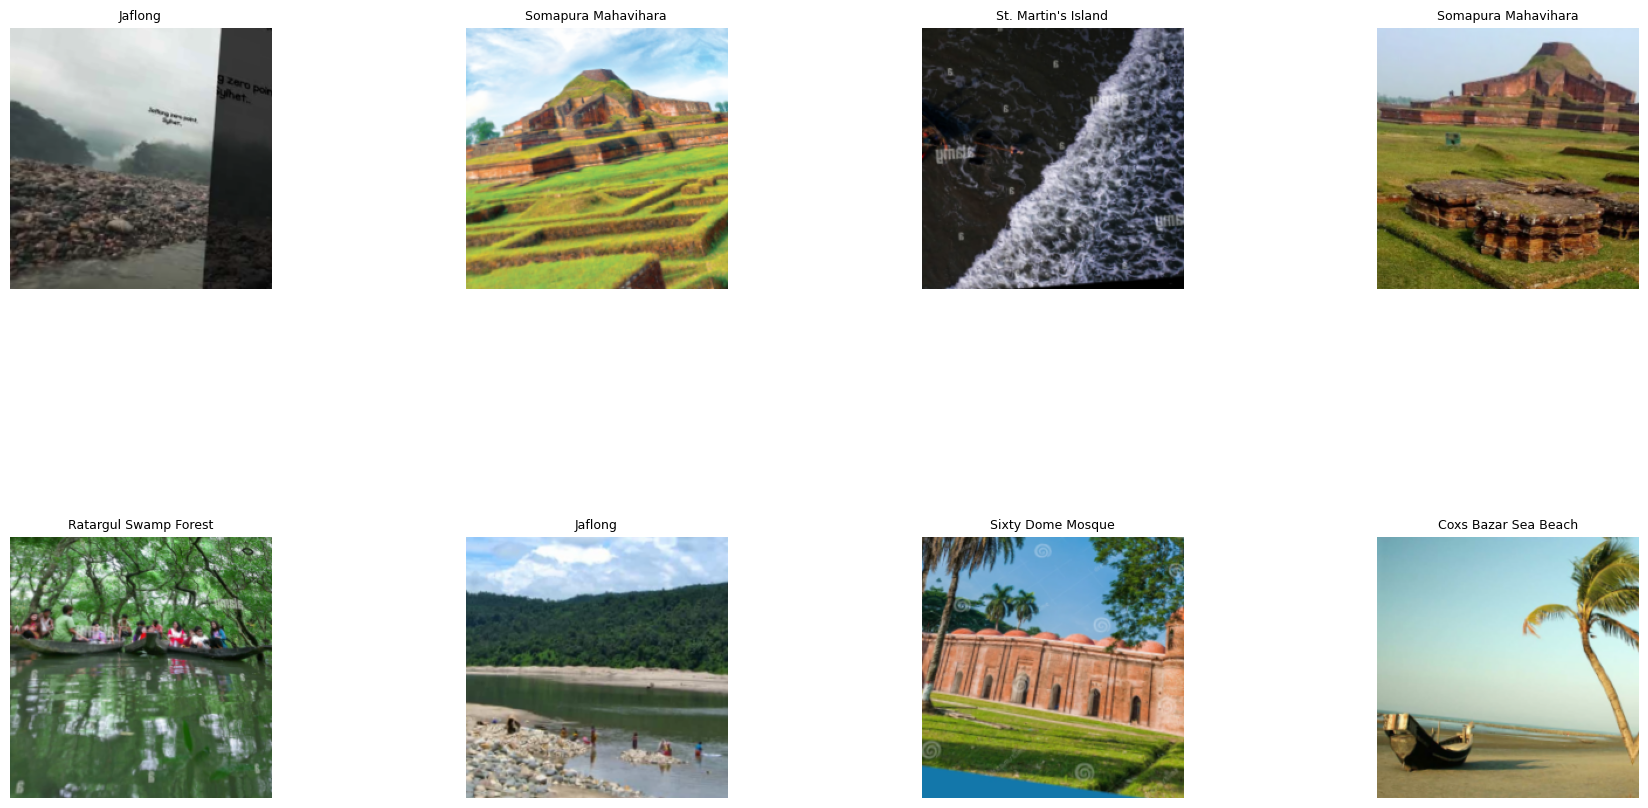

In [32]:
# TRAIN
dls.train.show_batch(max_n=8, nrows=2, figsize=(22, 10))  # bigger canvas
fig = plt.gcf()
for ax in fig.axes:
    t = ax.get_title()
    if t:
        ax.set_title(textwrap.fill(t, width=28), fontsize=9, pad=6)  # wrap + smaller
fig.subplots_adjust(hspace=0.95, wspace=0.35)  # more spacing
plt.show()

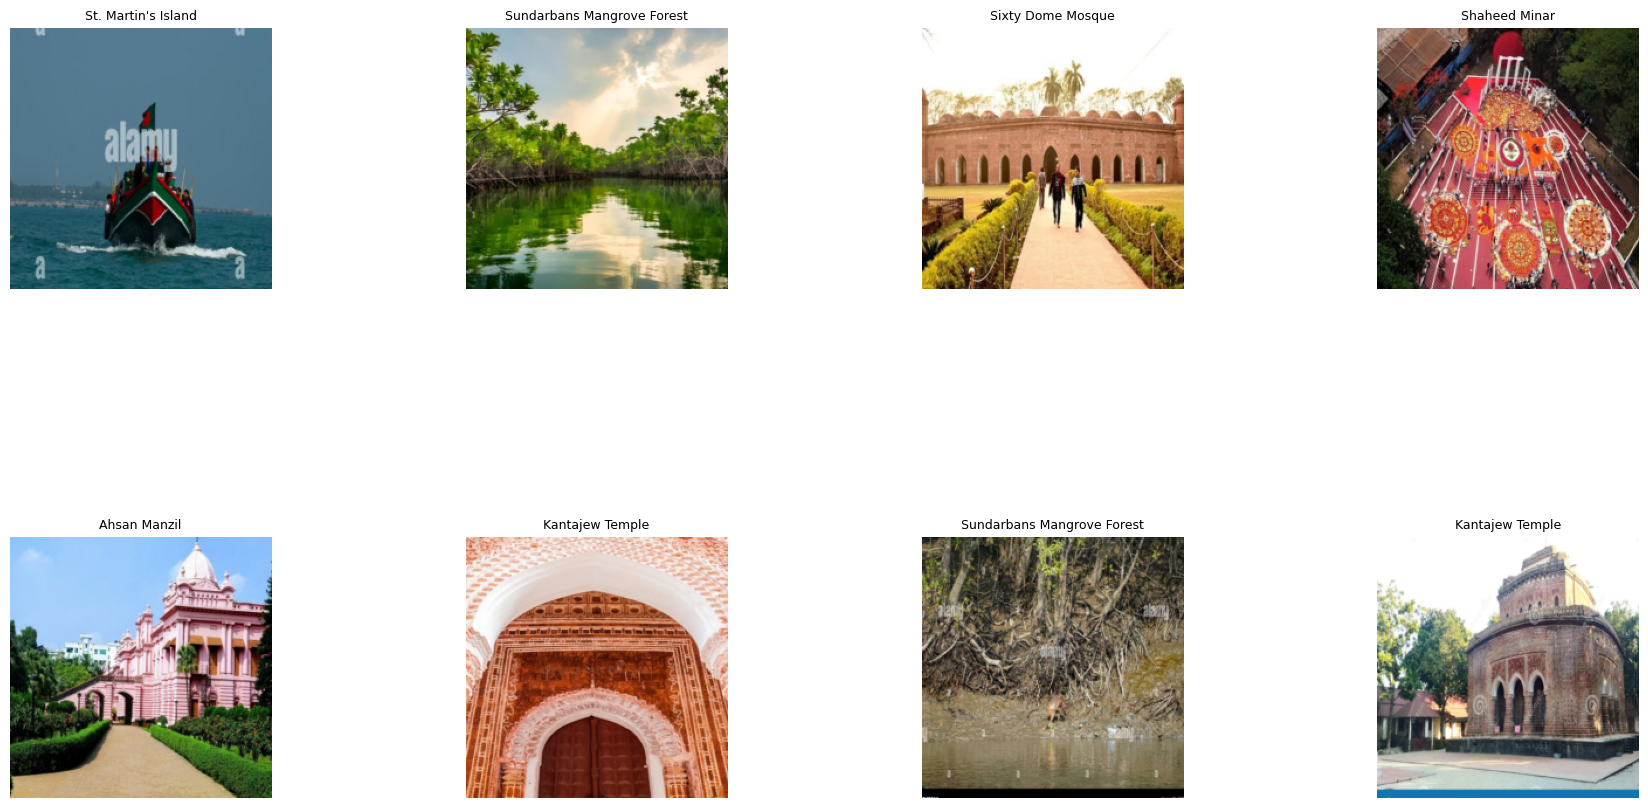

In [33]:
# VALID
dls.valid.show_batch(max_n=8, nrows=2, figsize=(22, 10))
fig = plt.gcf()
for ax in fig.axes:
    t = ax.get_title()
    if t:
        ax.set_title(textwrap.fill(t, width=28), fontsize=9, pad=6)
fig.subplots_adjust(hspace=0.95, wspace=0.35)
plt.show()

In [34]:
Path("models").mkdir(exist_ok=True)

models_to_train = [
    ("resnet50", resnet50),
    ("efficientnet_b0", efficientnet_b0),
    ("densenet121", densenet121),
    ("vgg19_bn", vgg19_bn)
]

results = {}

for name, arch in models_to_train:
    print(f"\n Training {name} ...")

    learner = vision_learner(dls, arch, metrics=[accuracy, error_rate], pretrained=True)

    learner.fine_tune(3)

    # Save model
    model_name = f"{name}_v{version}"
    learner.save(f"{model_name}")
    learner.export(f"{model_name}.pkl")

    # Store final validation accuracy
    acc = learner.validate()[1]
    results[name] = acc


print("\n All models trained and saved successfully!")


 Training resnet50 ...


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.655913,0.263732,0.919414,0.080586,02:54


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.252844,0.093852,0.973138,0.026862,02:55
1,0.153356,0.066027,0.984127,0.015873,02:56
2,0.082202,0.052523,0.987790,0.012210,02:55



 Training efficientnet_b0 ...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.804608,0.390826,0.873016,0.126984,02:40


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.475153,0.199255,0.931624,0.068376,02:44
1,0.313663,0.150151,0.958486,0.041514,02:44
2,0.288335,0.133072,0.963370,0.036630,02:44



 Training densenet121 ...


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.569957,0.222638,0.920635,0.079365,02:54


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.244152,0.124355,0.960928,0.039072,03:01
1,0.146583,0.063354,0.986569,0.013431,03:02
2,0.064582,0.064509,0.981685,0.018315,03:02



 Training vgg19_bn ...


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.779034,0.404662,0.881563,0.118437,03:04


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.309155,0.140774,0.958486,0.041514,03:16
1,0.164214,0.051964,0.986569,0.013431,03:19
2,0.073500,0.035919,0.991453,0.008547,03:19



 All models trained and saved successfully!


In [35]:
best_model = max(results, key=results.get)
print(f"Best model is **{best_model}** with Validation Accuracy = {results[best_model]:.4f}")

Best model is **vgg19_bn** with Validation Accuracy = 0.9915
